# Example 1: Sampling triplets from image dataset
In this notebook, we'll demonstrate how to sample triplets for training a Tile2Vec model from an image dataset.

In [1]:
import numpy as np
import os
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from src.sample_tiles import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In the workflow detailed in our paper, we exported NAIP imagery over Central California in a bunch of GeoTIFF files (the usual format with Google Earth Engine). We'll walk through sampling tiles from GeoTIFFs here, but a similar workflow can apply to other file formats as well.

Note that this notebook requires the user to have GDAL installed.

The sampling of triplet tiles can happen with an arbitrary number of images. The focus of our functions is on efficiency and scalability, since the overall area covered quite large and loading all images into memory is not advised. The process is broken down into:

1. Sampling triplets of images
2. Loading images one at a time and sampling tile centers from them
3. Extracting tiles given the tile center and radius

For simplicity, here we'll assume we're sampling from just 1 GeoTIFF file.

## Step 1. Sample image names

We assume that the anchor tile and neighbor tile will come from the same image, and the distant tile may or may not come from the same image. Therefore to sample $n$ triplets, we first sample $2n$ image names from which to sample tiles.

Let's sample 20 tiles.

In [6]:
img_dir = '../data/images' # directory where images are saved
img_triplets = get_triplet_imgs(img_dir, n_triplets=20) # This means we need 40 images
print(img_triplets[:5,:])

[['0.tif' '2.tif']
 ['2.tif' '3.tif']
 ['1.tif' '1.tif']
 ['3.tif' '1.tif']
 ['2.tif' '3.tif']]


Since we only have one image, all tiles are coming from 0.tif.

## Steps 2 & 3. Load images, sample tile centers, and extract tiles

Next we feed the list of images into the get_triplet_tiles function, which loads in each image sequentially and samples tile centers for all tiles that come from that image. This way a given image is only loaded once.

In [7]:
tile_dir = '../data/example_tiles2' # where you want to save your tiles
tiles = get_triplet_tiles(tile_dir,
                          img_dir, 
                          img_triplets, 
                          tile_size=50,
                          val_type='uint8',
                          bands_only=True,
                          save=True,
                          verbose=True)

Sampling image 0.tif
    Saving anchor and neighbor tile #0
    Anchor tile center:(285, 773)
    Neighbor tile center:(266, 697)
    Saving anchor and neighbor tile #8
    Anchor tile center:(1117, 918)
    Neighbor tile center:(1172, 982)
    Saving anchor and neighbor tile #14
    Anchor tile center:(562, 1098)
    Neighbor tile center:(525, 1043)
    Saving distant tile #15
    Distant tile center:(122, 192)
Sampling image 1.tif
    Saving anchor and neighbor tile #2
    Anchor tile center:(616, 898)
    Neighbor tile center:(523, 798)
    Saving distant tile #2
    Distant tile center:(791, 122)
    Saving distant tile #3
    Distant tile center:(538, 666)
    Saving distant tile #5
    Distant tile center:(919, 516)
    Saving distant tile #6
    Distant tile center:(183, 824)
    Saving anchor and neighbor tile #10
    Anchor tile center:(397, 350)
    Neighbor tile center:(408, 253)
    Saving distant tile #10
    Distant tile center:(1108, 833)
    Saving anchor and neighbor t

## Visualize some tiles!

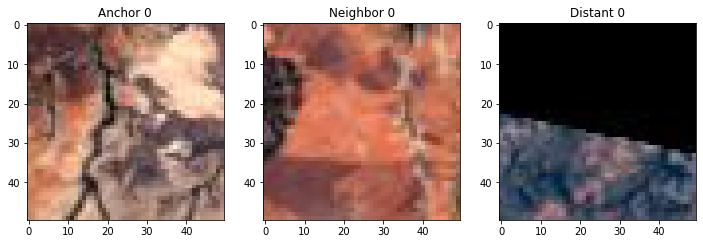

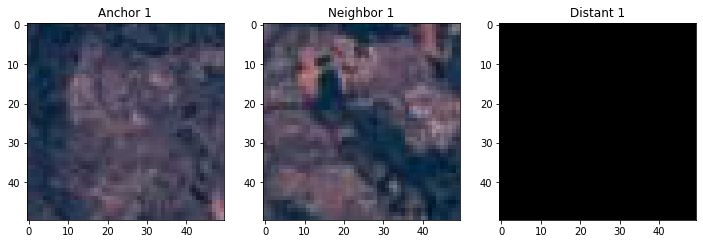

In [8]:
tile_dir = '../data/example_tiles2/'
n_triplets = 2
plt.rcParams['figure.figsize'] = (12,4)
for i in range(n_triplets):
    tile = np.load(os.path.join(tile_dir, str(i)+'anchor.npy'))
    neighbor = np.load(os.path.join(tile_dir, str(i)+'neighbor.npy'))
    distant = np.load(os.path.join(tile_dir, str(i)+'distant.npy'))
    
    vmin = np.array([tile, neighbor, distant]).min()
    vmax = np.array([tile, neighbor, distant]).max()
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(tile[:,:,[0,1,2]])
    plt.title('Anchor '+str(i))
    plt.subplot(1,3,2)
    plt.imshow(neighbor[:,:,[0,1,2]])
    plt.title('Neighbor '+str(i))
    plt.subplot(1,3,3)
    plt.imshow(distant[:,:,[0,1,2]])
    plt.title('Distant '+str(i))

Looks like we got what we wanted. The anchor and neighbor tiles look like they belong to the same class, and are different from the distant tile.